# Exercises (a)

1. Create a $200 \times 200$ white image and display it. 
2. Leverage your image processing skills to create a simple wallpaper design as shown in the following image:

![pattern](img_embed/exercise_w4.jpg "Pattern")

In [2]:
import numpy as np
import cv2 as cv
from utils import display_image

## Question 1

In [3]:
white_img = np.zeros((200, 200)) + 255
white_img = white_img.astype(np.uint8)

display_image("white image", white_img)

## Question 2

In [4]:
import matplotlib.pyplot as plt

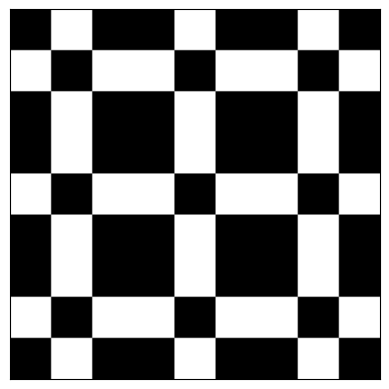

In [7]:
unit = np.zeros((60, 60), dtype=np.uint8)

unit[:20, 20:40] = 255
unit[20:40, :20] = 255
unit[20:40, 40:] = 255
unit[40:, 20:40] = 255

img = np.tile(unit, (3, 3))

plt.imshow(img, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

# Exercise (b) (NumPy array slicing)
1. Extract the region of interest (flower) from the 'flower.jfif'.

## Question 1

In [8]:
# Solution 1: using mouse callback
img = cv.imread("images/flower.jfif")
pts = []

def mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        pts.append((x, y))
        print((x, y))
        cv.imshow("image", img)

cv.imshow("image", img)
cv.setMouseCallback("image", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

(90, 38)
(173, 119)


In [9]:
print(pts)

[(90, 38), (173, 119)]


In [10]:
flower = img[pts[0][1]:pts[1][1], pts[0][0]:pts[1][0]]
display_image("flower", flower)

# Solution 2: Use `cv.selectROI()` function

In [11]:
r = cv.selectROI("select box", img)
print(r)   # (x, y, w, h)

cv.destroyAllWindows()

(92, 40, 84, 81)


In [12]:
flower = img[r[1]:r[1] + r[3], r[0]:r[0] + r[2]]
display_image("flower", flower)

You can use external software like "Paint" to retrieve the image coordinates that surround the flower.

# Exercises (c)
1. Divide the image into 4 equal regions. Swap their positions as shown below:

   ![dog_swap](img_embed/crop_swap.PNG "dog")
2. Cover the face of lena with white mask as shown as the following:

   ![lena_mask](img_embed/lena_mask.PNG "lena mask")

## Question 1

In [14]:
img = cv.imread("images/dog.jfif")

half_height, half_width = img.shape[0] // 2, img.shape[1] // 2

empty_img = np.empty_like(img)
empty_img[:half_height, :half_width] = img[half_height:, half_width:]
empty_img[:half_height, half_width:] = img[half_height:, :half_width]
empty_img[half_height:, :half_width] = img[:half_height, half_width:]
empty_img[half_height:, half_width:] = img[:half_height, :half_width]

display_image("swap", empty_img)

## Question 2

In [15]:
img = cv.imread("images/lena.jfif")
pts = []

cv.imshow("image", img)
cv.setMouseCallback("image", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

(97, 88)
(154, 168)


In [16]:
print(pts)

[(97, 88), (154, 168)]


In [18]:
img[pts[0][1]:pts[1][1], pts[0][0]:pts[1][0]] = 255
display_image("cover", img)

# Exercises (d)
1. Display the blue, green and red channel of the **lena** image simultaneously. Comment on the images displayed.
2. Display the following images which originates from the file "images/dog.jfif".

![exercise_fig](img_embed/diff_color_channels.jpg "color dogs")

## Question 1

In [19]:
from utils import matplotlib_show_images

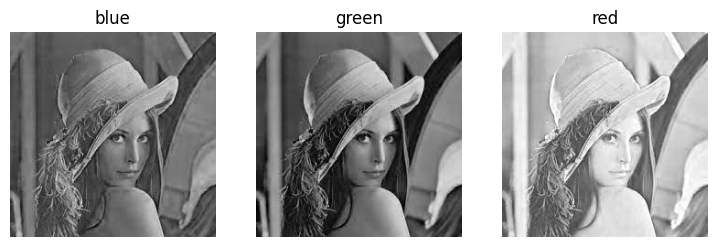

In [20]:
img = cv.imread("images/lena.jfif")

b, g, r = cv.split(img)

matplotlib_show_images((b, g, r), 1, 3, titles=["blue", "green", "red"], figsize=(9, 3))

It is apparent that red channel array has a higher average intensity compared blue and green.

## Question 2

In [21]:
img = cv.imread("images/dog.jfif")
color = ("blue", "green", "red")

for i, c in enumerate(color):
    img_copy = img.copy()
    img_copy[..., i] = 255
    cv.imshow(c, img_copy)

cv.waitKey(0)
cv.destroyAllWindows()

# Exercise (e)
1. Create a **random noise color and grayscale** image. You can set your own width and height, but keep the total number of pixels of both images identical.
2. Convert the code chunk found under section. Divide an image into smaller patches using cropping into a function with the following signature:
```python
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
 # img is the source image
 # num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
 # line_color is the color of the grid line.
 # The output of the function should be image with grids
```
3. How would you *change the brightness* of a **color image**? Suggest **two ways** to perform the image processing operations. Implement your methods by providing the example codes. You are free to choose any image.
4. Provide at least one common use case(s) for the following color spaces:
    - RGB
    - HSV
    - CIELAB

# Setup

In [1]:
import cv2 as cv
import numpy as np

# Question 1

In [2]:
# Question 1
n_pixels = 60_000
rng = np.random.default_rng(0)
random_array = rng.integers(0, 256, size=(n_pixels,), dtype="uint8")

# Reshape to 2D matrix
gray = random_array.reshape((200, -1))

color = random_array.reshape((200, -1, 3))

cv.imshow("gray", gray)
cv.imshow("color", color)
cv.waitKey(0)
cv.destroyAllWindows()

# Question 2

In [3]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    img_copy = img.copy()
    height, width = img.shape[:2]
    # num_vertical_patches = 2
    # num_horizontal_patches = 3

    # M and N are basically number of pixels per patch
    M, N = int(height / num_vertical_grid), int(width / num_horizontal_grid)

    x1, y1 = 0, 0

    for y in range(0, height, M):
        for x in range(0, width, N):

            y1 = y + M
            x1 = x + N

            if x1>=width and y1>=height:
                x1 = width-1
                y1 = height-1
                tile = img[y:height, x:width]
                cv.rectangle(img_copy, (x,y), (x1, y1), line_color, 1)
                # cv.imshow('tile', tile)

            elif y1>=height:
                y1 = height-1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)

            elif x1>=width:
                x1 = width-1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color , 1)

            else:
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                
    cv.imshow('image', img_copy)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [4]:
img = cv.imread("images/lena.jfif")

crop_grid(img, 3, 3, (255, 0, 0))

# Question 3

In [5]:
from utils import point_op

In [6]:
img = cv.imread("images/alley_night.jpg")

# first way: apply point operator on RGB image
alpha = 1
beta = 50  # enhance brightness if beta > 0
dst1 = point_op(img, alpha, beta)

# 2nd way: apply point operator on L channel in LAB color space
img_lab = cv.cvtColor(img, cv.COLOR_LBGR2LAB)
l, a, b = cv.split(img_lab)
l_bright = point_op(l, alpha, beta)
dst2 = cv.merge((l_bright, a, b))
dst2 = cv.cvtColor(dst2, cv.COLOR_LAB2BGR)

cv.imshow("original", img)
cv.imshow("1st way", dst1)
cv.imshow("2nd way", dst2)
cv.waitKey(0)
cv.destroyAllWindows()

# Question 4

| Color spaces | Use cases |
| --- | --- |
| RGB | Digital imaging displays, like monitor, TV and cameras |
| CIELAB | Accurate color difference calculations, such as quality control in manufacturing and color matching in printing |
| HSV | Image segmentation, especially for objects with distinct colors |